In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.constants

plt.rcParams['figure.figsize'] = (7, 3.5)

In [2]:
carrier_freq = 2251.113e6

In [3]:
downsample = 4
samp_rate = 104166 / (5206 * downsample)
# frequency is given as offset from 2251.113 MHz
freq_offset = 2000 + 4200
print(samp_rate)
t0 = np.datetime64('2025-03-02T07:46:30')

5.002208989627353


In [4]:
samp_rate_dwingeloo = 20 / downsample
freq_offset_dwingeloo = 2250700000 - 2251_113_000 + 415880
t0_dwingeloo = np.datetime64('2025-03-02T08:24:29.780917')

In [5]:
def load_phase(path):
    raw = np.fromfile(path, 'uint8').reshape(-1, 12)
    integer_part = raw[::downsample, :8].view('int64').ravel()
    frac_part = raw[::downsample, 8:].view('float32').ravel() / (2 * np.pi)
    return integer_part, frac_part

phase_upper = load_phase('phase_upper.raw')
phase_lower = load_phase('phase_lower.raw')
assert phase_upper[0].size == phase_lower[0].size
t = np.arange(phase_upper[0].size) * (1e9 / samp_rate) * np.timedelta64(1, 'ns') + t0
t_freq = np.arange(0.5, phase_upper[0].size - 1) * (1e9 / samp_rate) * np.timedelta64(1, 'ns') + t0

phase_upper_dwingeloo = load_phase('phase_upper_dwingeloo.raw')
phase_lower_dwingeloo = load_phase('phase_lower_dwingeloo.raw')
assert phase_upper_dwingeloo[0].size == phase_lower_dwingeloo[0].size
t_dwingeloo = np.arange(phase_upper_dwingeloo[0].size) * (1e9 / samp_rate_dwingeloo) * np.timedelta64(1, 'ns') + t0_dwingeloo
t_freq_dwingeloo = np.arange(0.5, phase_upper_dwingeloo[0].size - 1) * (1e9 / samp_rate_dwingeloo) * np.timedelta64(1, 'ns') + t0_dwingeloo

In [6]:
# factor 0.5 because the phase was measured from the signal squared
freq_upper = 0.5 * (np.diff(phase_upper[0]) + np.diff(phase_upper[1])) * samp_rate
freq_lower = 0.5 * (np.diff(phase_lower[0]) + np.diff(phase_lower[1])) * samp_rate
# frequency is given as offset from 2251 MHz
freq_avg = 0.5 * (freq_upper + freq_lower) + freq_offset

freq_upper_dwingeloo = 0.5 * (np.diff(phase_upper_dwingeloo[0]) + np.diff(phase_upper_dwingeloo[1])) * samp_rate_dwingeloo
freq_lower_dwingeloo = 0.5 * (np.diff(phase_lower_dwingeloo[0]) + np.diff(phase_lower_dwingeloo[1])) * samp_rate_dwingeloo
freq_avg_dwingeloo = 0.5 * (freq_upper_dwingeloo + freq_lower_dwingeloo) + freq_offset_dwingeloo

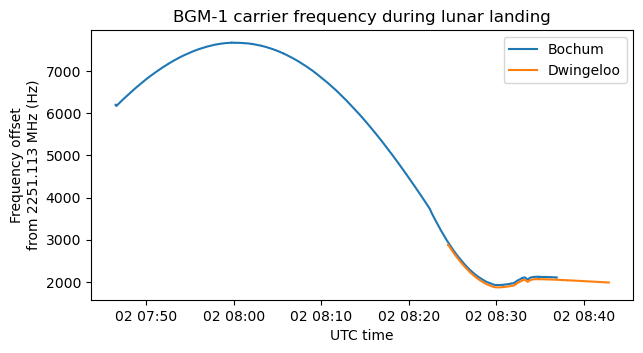

In [7]:
plt.plot(t_freq, freq_avg, label='Bochum')
plt.plot(t_freq_dwingeloo, freq_avg_dwingeloo, label='Dwingeloo')
plt.legend()
plt.xlabel('UTC time')
plt.ylabel('Frequency offset\nfrom 2251.113 MHz (Hz)')
plt.title('BGM-1 carrier frequency during lunar landing');

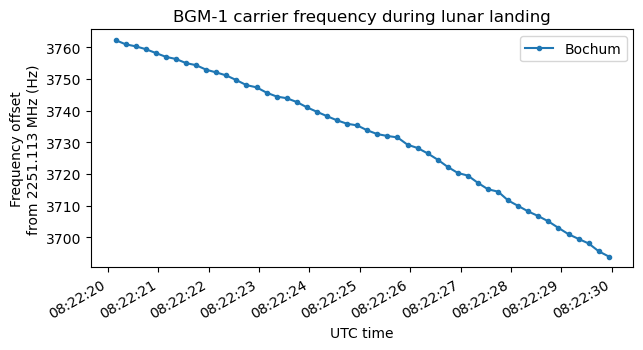

In [8]:
sel = (t_freq >= np.datetime64('2025-03-02T08:22:20')) & (t_freq <= np.datetime64('2025-03-02T08:22:30'))
plt.plot(t_freq[sel], freq_avg[sel], '.-', label='Bochum')
plt.legend()
plt.gcf().autofmt_xdate()
plt.xlabel('UTC time')
plt.ylabel('Frequency offset\nfrom 2251.113 MHz (Hz)')
plt.title('BGM-1 carrier frequency during lunar landing');

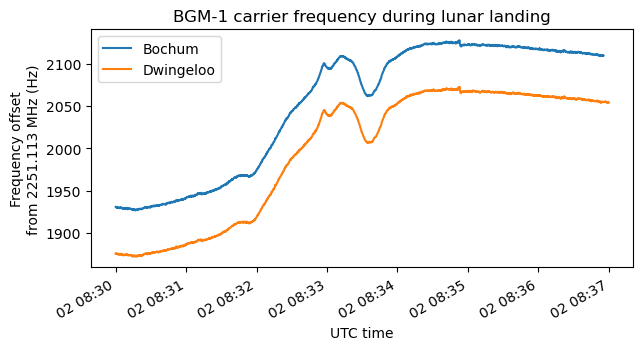

In [9]:
sel = (t_freq >= np.datetime64('2025-03-02T08:30')) & (t_freq <= np.datetime64('2025-03-02T08:37'))
plt.plot(t_freq[sel], freq_avg[sel], label='Bochum')
sel = (t_freq_dwingeloo >= np.datetime64('2025-03-02T08:30')) & (t_freq_dwingeloo <= np.datetime64('2025-03-02T08:37'))
plt.plot(t_freq_dwingeloo[sel], freq_avg_dwingeloo[sel], label='Dwingeloo')
plt.legend()
plt.gcf().autofmt_xdate()
plt.xlabel('UTC time')
plt.ylabel('Frequency offset\nfrom 2251.113 MHz (Hz)')
plt.title('BGM-1 carrier frequency during lunar landing');

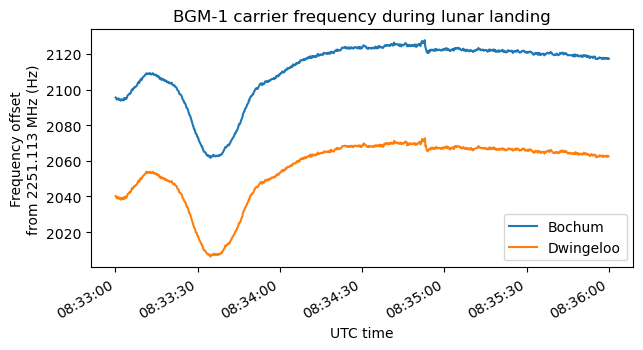

In [10]:
sel = (t_freq >= np.datetime64('2025-03-02T08:33')) & (t_freq <= np.datetime64('2025-03-02T08:36'))
plt.plot(t_freq[sel], freq_avg[sel], label='Bochum')
sel = (t_freq_dwingeloo >= np.datetime64('2025-03-02T08:33')) & (t_freq_dwingeloo <= np.datetime64('2025-03-02T08:36'))
plt.plot(t_freq_dwingeloo[sel], freq_avg_dwingeloo[sel], label='Dwingeloo')
plt.legend()
plt.gcf().autofmt_xdate()
plt.xlabel('UTC time')
plt.ylabel('Frequency offset\nfrom 2251.113 MHz (Hz)')
plt.title('BGM-1 carrier frequency during lunar landing');

In [11]:
lunar_doppler_file = 'MareCrisiumCoords.txt'
with open(lunar_doppler_file) as f:
    lunar_doppler = np.array([[float(a) for a in line.split()] for line in f.readlines()[1:]])
r_bochum = lunar_doppler[:, 1:4]
v_bochum = lunar_doppler[:, 4:7]
vr_bochum = np.sum(r_bochum * v_bochum, axis=1) / np.sqrt(np.sum(r_bochum**2, axis=1))
lunar_doppler_bochum = -1e3 * vr_bochum * carrier_freq / scipy.constants.c
r_dwingeloo = lunar_doppler[:, 7:10]
v_dwingeloo = lunar_doppler[:, 10:13]
vr_dwingeloo = np.sum(r_dwingeloo * v_dwingeloo, axis=1) / np.sqrt(np.sum(r_dwingeloo**2, axis=1))
lunar_doppler_dwingeloo = -1e3 * vr_dwingeloo * carrier_freq / scipy.constants.c

mjd_unixtimestamp_offset = 10587.5
seconds_in_day = 3600 * 24

def mjd2unixtimestamp(m):
    return (m - mjd_unixtimestamp_offset) * seconds_in_day

lunar_doppler_t = mjd2unixtimestamp(lunar_doppler[:, 0]) * 1e9 * np.timedelta64(1, 'ns') + np.datetime64('1970-01-01T00:00:00')

In [12]:
lunar_doppler_bochum_interp = np.interp((t_freq - t_freq[0]) / np.timedelta64(1, 's'),
                                        (lunar_doppler_t - t_freq[0]) / np.timedelta64(1, 's'),
                                        lunar_doppler_bochum)
lunar_doppler_dwingeloo_interp = np.interp((t_freq_dwingeloo - t_freq[0]) / np.timedelta64(1, 's'),
                                           (lunar_doppler_t - t_freq[0]) / np.timedelta64(1, 's'),
                                           lunar_doppler_bochum)

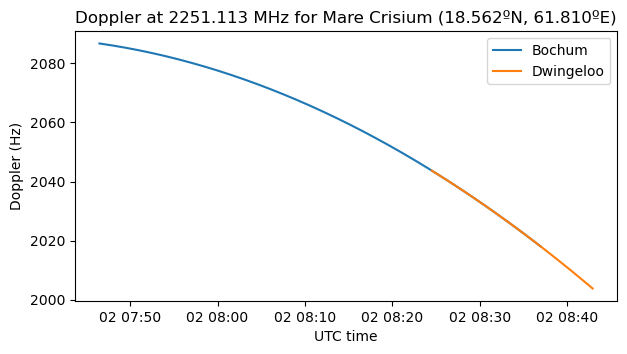

In [19]:
plt.plot(t_freq, lunar_doppler_bochum_interp, label='Bochum')
plt.plot(t_freq_dwingeloo, lunar_doppler_dwingeloo_interp, label='Dwingeloo')
plt.legend()
plt.xlabel('UTC time')
plt.ylabel('Doppler (Hz)')
plt.title('Doppler at 2251.113 MHz for Mare Crisium (18.562ºN, 61.810ºE)');

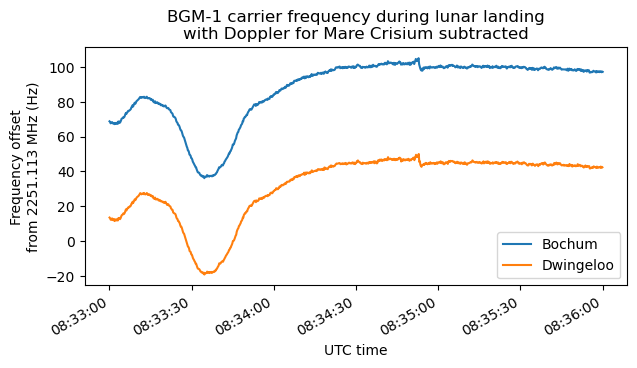

In [14]:
sel = (t_freq >= np.datetime64('2025-03-02T08:33')) & (t_freq <= np.datetime64('2025-03-02T08:36'))
plt.plot(t_freq[sel], freq_avg[sel] - lunar_doppler_bochum_interp[sel], label='Bochum')
sel = (t_freq_dwingeloo >= np.datetime64('2025-03-02T08:33')) & (t_freq_dwingeloo <= np.datetime64('2025-03-02T08:36'))
plt.plot(t_freq_dwingeloo[sel], freq_avg_dwingeloo[sel] - lunar_doppler_dwingeloo_interp[sel], label='Dwingeloo')
plt.legend()
plt.gcf().autofmt_xdate()
plt.xlabel('UTC time')
plt.ylabel('Frequency offset\nfrom 2251.113 MHz (Hz)')
plt.title('BGM-1 carrier frequency during lunar landing\nwith Doppler for Mare Crisium subtracted');

In [15]:
freq_avg_bochum = np.interp((t_freq_dwingeloo - t_freq_dwingeloo[0]) / np.timedelta64(1, 's'),
                            (t_freq - t_freq_dwingeloo[0]) / np.timedelta64(1, 's'),
                            freq_avg - lunar_doppler_bochum_interp, left=np.nan, right=np.nan)

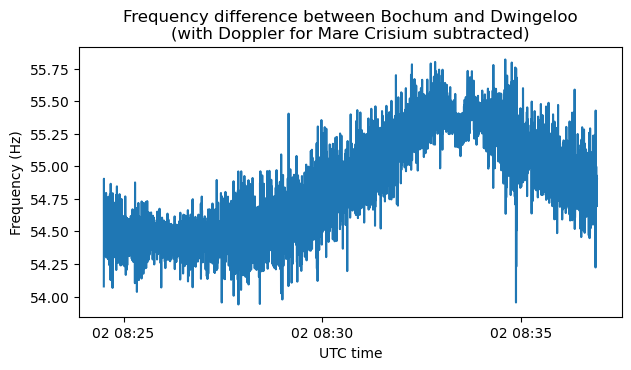

In [16]:
skip = 1
plt.plot(t_freq_dwingeloo[skip:], (freq_avg_bochum - freq_avg_dwingeloo + lunar_doppler_dwingeloo_interp)[skip:])
plt.xlabel('UTC time')
plt.ylabel('Frequency (Hz)')
plt.title('Frequency difference between Bochum and Dwingeloo\n(with Doppler for Mare Crisium subtracted)');

In [17]:
r_bochum_landing = lunar_doppler[:, 13:16]
earth_elevation_deg = np.average(np.rad2deg(np.arcsin(r_bochum_landing[:, 2] / np.sqrt(np.sum(r_bochum_landing**2, axis=1)))))
earth_elevation_deg

np.float64(26.327245797946723)

In [18]:
scipy.constants.c / (np.sin(np.deg2rad(earth_elevation_deg)) * carrier_freq)

np.float64(0.3002840632684141)